1. Read the data into a notebook and make into a dataframe

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Sample_Data.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')#converting timestamp data to datetime format

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21919 entries, 0 to 21918
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Values     21919 non-null  int64         
 1   Timestamp  21919 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 342.6 KB


,Values,Timestamp
0,100,2024-06-26 06:17:00
1,100,2024-06-26 06:18:00
2,100,2024-06-26 06:18:00
3,100,2024-06-26 06:18:00
4,100,2024-06-26 06:19:00


*   2. Preprocess the data to make it usable
*   3. There may be some outliers and/or anomalies in the data that may cause problem , remove them



count    21919.000000
mean        67.326292
std         21.794677
min         25.000000
25%         47.000000
50%         68.000000
75%         88.000000
max        100.000000
Name: Values, dtype: float64


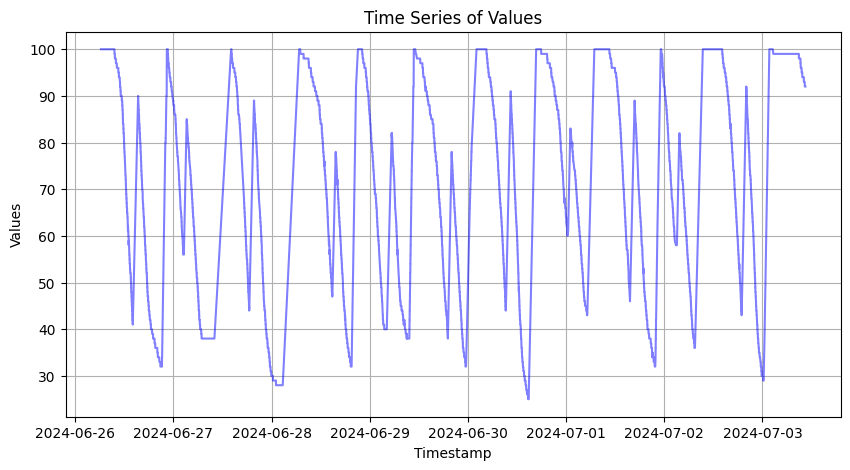


Original data points: 21919
Cleaned data points: 18924
Outliers removed: 2995


In [3]:
print(df['Values'].describe())


plt.figure(figsize=(10, 5))
plt.plot(df['Timestamp'], df['Values'], 'b-', alpha=0.5)
plt.title('Time Series of Values')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Removing  outliers based on graph
df_clean = df[(df['Values'] >= 40) & (df['Values'] <= 110)].copy()

print(f"\nOriginal data points: {len(df)}")
print(f"Cleaned data points: {len(df_clean)}")
print(f"Outliers removed: {len(df) - len(df_clean)}")

4.  Find min max average

In [5]:
min_val = df_clean['Values'].min()
max_val = df_clean['Values'].max()
avg_val = df_clean['Values'].mean()

print("\nBasic Statistics for Cleaned Data:")
print(f"Minimum value: {min_val}")
print(f"Maximum value: {max_val}")
print(f"Average value: {avg_val:.2f}")


Basic Statistics for Cleaned Data:
Minimum value: 40
Maximum value: 100
Average value: 72.57


5. Plot the data on a histogram

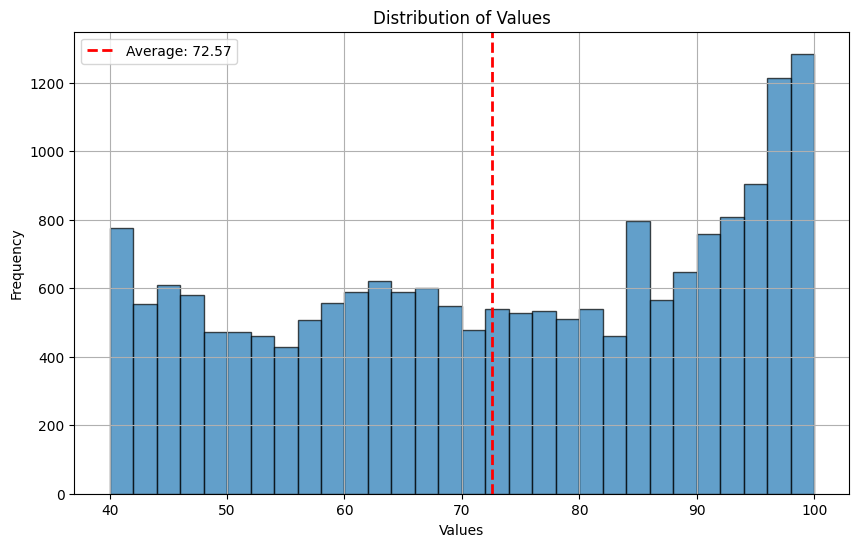

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Values'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(avg_val, color='red', linestyle='dashed', linewidth=2, label=f'Average: {avg_val:.2f}')
plt.title('Distribution of Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

6. Plot the data for the 12th and plot a bar chart and color every data below average as red.*(Assumption made: 12th of june was not in the data so the visualization is done for 26thh june instead.)*

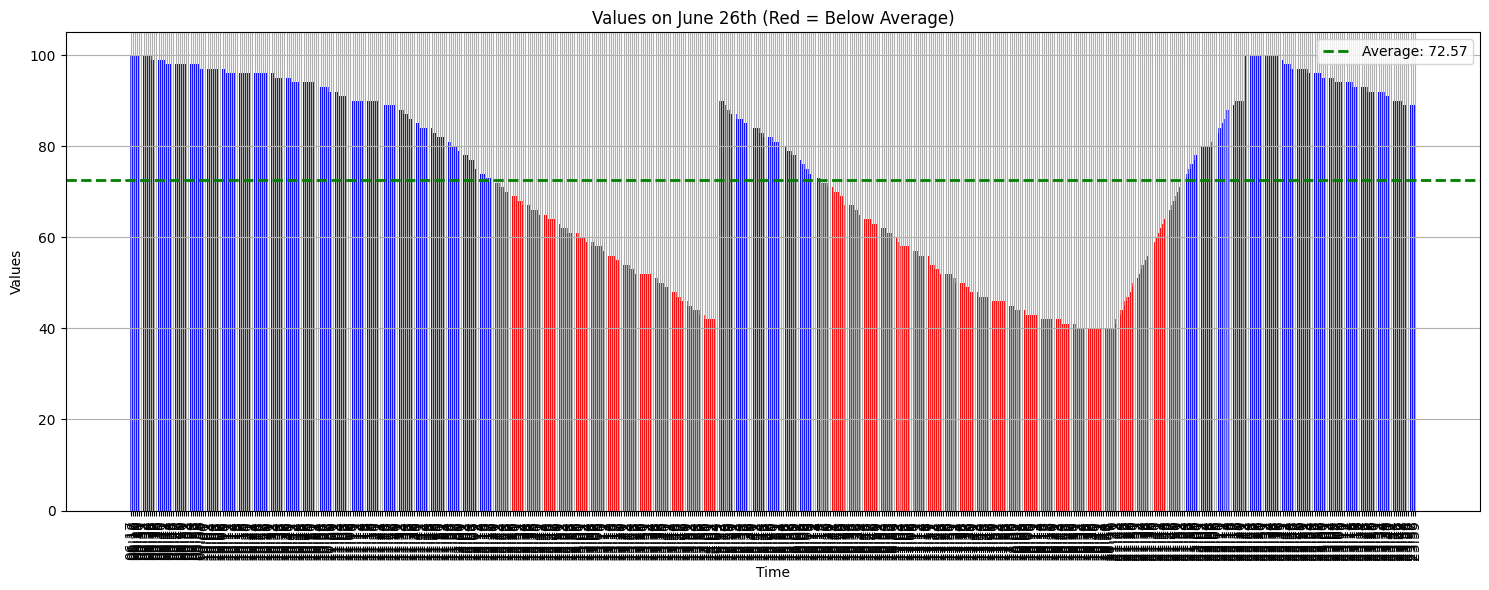

In [7]:
june_26_data = df_clean[df_clean['Timestamp'].dt.day == 26].copy()

june_26_data['Below_Avg'] = june_26_data['Values'] < avg_val

plt.figure(figsize=(15, 6))
colors = ['red' if x else 'blue' for x in june_26_data['Below_Avg']]
plt.bar(june_26_data['Timestamp'].dt.strftime('%H:%M'), june_26_data['Values'], color=colors, alpha=0.7)
plt.axhline(avg_val, color='green', linestyle='dashed', linewidth=2, label=f'Average: {avg_val:.2f}')
plt.title('Values on June 26th (Red = Below Average)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()